# Experiment 3

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp

pd.options.display.float_format = '{:.3f}'.format

In [2]:
!ls

Exp1.ipynb       main.py          returns.csv      returns_stable.R
Exp2.ipynb       new_data.csv     returns_in.csv   speed.csv
Exp3.ipynb       packets.csv      returns_out.csv  volume.csv


In [3]:
def read_data(filename):
    data = pd.read_csv(filename)
    data.rename(columns={'Time': 'time', 'IN Traffic': 'in', 'OUT Traffic': 'out'}, inplace=True)
    data['time'] =  pd.to_datetime(data['time'], format='%b-%d-%y %H:%M')
    return data


In [9]:
# packets_data = read_data('new_data.csv')
packets_data = read_data('packets.csv')
packets_data = packets_data.iloc[::-1]
# packets_data.drop([493, 492, 491, 490, 489, 488, 487, 486, 485, 247 ], axis=0, inplace=True)
packets_data.reset_index(inplace=True)
packets_data.drop('index', axis=1, inplace=True)


In [10]:
packets_data.head()

,time,in,out
0,2021-02-08 11:32:00,11882,17265
1,2021-02-08 11:33:00,16104,15204
2,2021-02-08 11:34:00,14514,28119
3,2021-02-08 11:35:00,18089,30348
4,2021-02-08 11:36:00,110958,149672


Working with packets data

In [11]:
packets_data[['in', 'out']].describe()

,in,out
count,529.000,529.000
mean,69028.087,99725.648
std,195073.441,232654.303
min,3297.000,3363.000
25%,14686.000,23510.000
50%,25476.000,47925.000
75%,55640.000,96182.000
max,2592923.000,3311913.000


In [12]:
def plot_dist_time(data, figsize=(10, 5), ylabel='', draw_line=False):
    plt.figure(figsize=figsize)
    plt.plot(data)
    if draw_line:
        alpha = (data[len(data) - 1] - data[0]) / len(data)
        plt.plot(alpha*np.arange(0, len(data) - 1), color='red', linewidth=0.5)
    plt.ylabel(ylabel)
    plt.xlabel('Time (min)')
    plt.grid()
    plt.show()

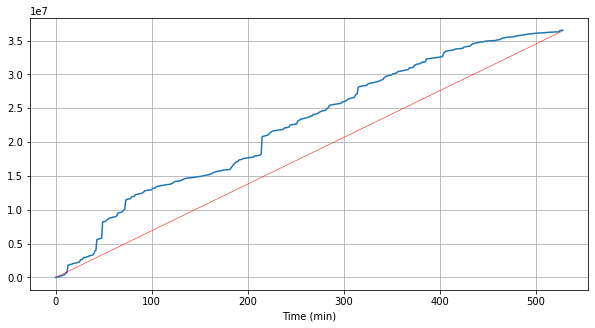

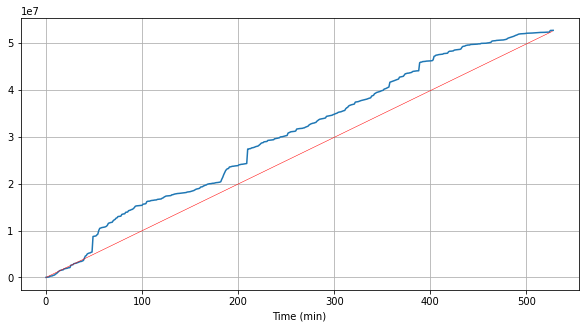

In [13]:
plot_dist_time(np.cumsum(packets_data['in']), draw_line=True)
plot_dist_time(np.cumsum(packets_data['out']), draw_line=True)

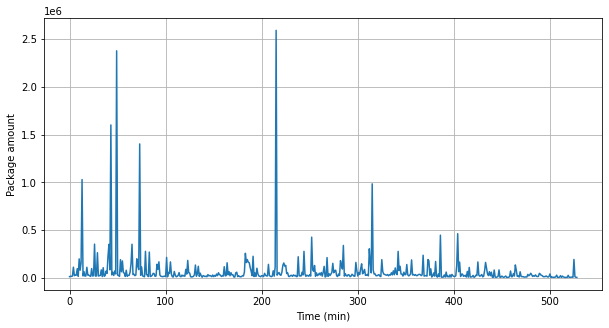

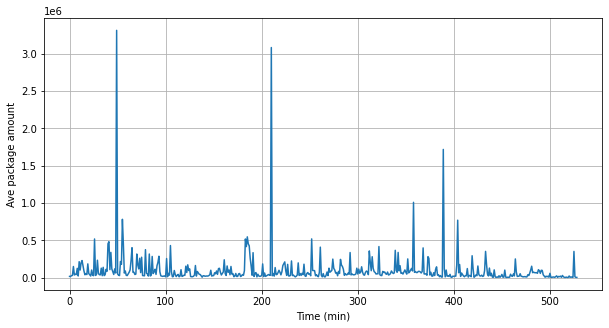

In [14]:
plot_dist_time(packets_data['in'], ylabel='Package amount')
plot_dist_time(packets_data['out'], ylabel='Ave package amount')

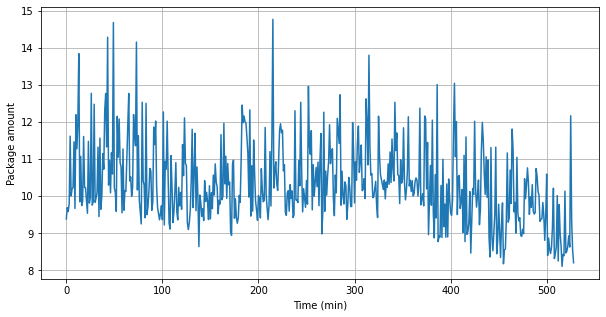

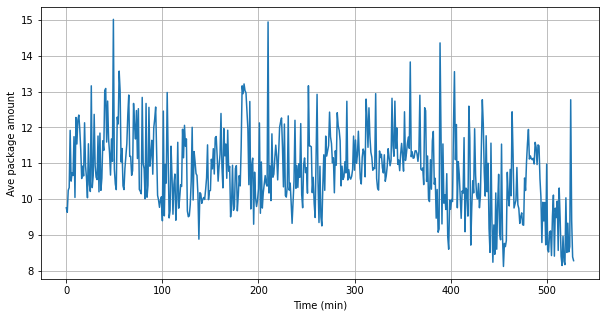

In [15]:
plot_dist_time(np.log(packets_data['in']), ylabel='Package amount')
plot_dist_time(np.log(packets_data['out']), ylabel='Ave package amount')

In [16]:
log_in = np.log(packets_data['in'])
log_out = np.log(packets_data['out'])

In [17]:
pd.DataFrame(log_in).to_csv('log_in.csv')
pd.DataFrame(log_out).to_csv('log_out.csv')

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


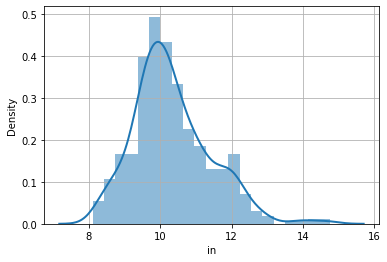

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


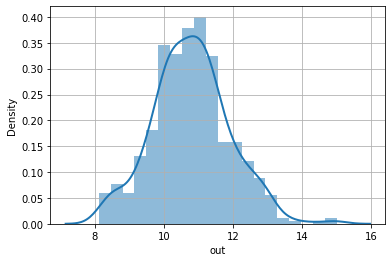

In [18]:
sns.distplot(log_in, kde = True,
             hist_kws = {'alpha': 0.5},
             kde_kws = {'linewidth': 2})
plt.grid()
plt.show()

sns.distplot(log_out, kde = True,
             hist_kws = {'alpha': 0.5},
             kde_kws = {'linewidth': 2})
plt.grid()
plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


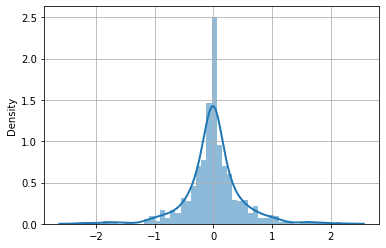

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


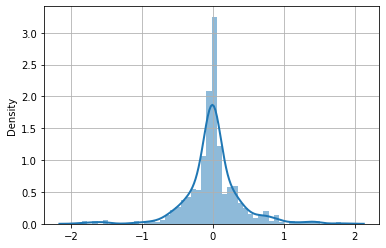

In [81]:
sns.distplot(returns_in, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2})
plt.grid()
plt.show()

sns.distplot(returns_out, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2})
plt.grid()
plt.show()

## Parameters estimation

In [20]:
import levy

In [21]:
levy.fit_levy(log_in) # -- Fit a stable distribution to x

(par=0, alpha=1.75, beta=1.00, mu=10.11, sigma=0.68, 775.6143696122015)

In [22]:
levy.fit_levy(log_out)

(par=0, alpha=1.95, beta=1.00, mu=10.74, sigma=0.77, 806.4917716280828)

## Distribution comparasing

In [33]:
def compare_real_and_fake(real, fake, title='', bins=50):
    plt.figure(figsize=(7, 5))
#     plt.hist(real, bins, alpha=0.5, label='Real data for r(t)', density=True)
#     plt.hist(fake, bins, alpha=0.5, label='Generated data for r(t)', density=True)
    sns.distplot(real, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Real data for r(t)')
    sns.distplot(fake, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Generated data for r(t)')
    plt.title(title)
    plt.xlim((5, 20))
    plt.legend(loc='upper right')
    plt.show()
    
    print('KS-test: ', ks_2samp(real, fake))


In [62]:
# alpha, beta, mu, sigma
ml = levy.random(1.7487510, 0.9990000, 10.1120248, 0.6761528 , shape=(1000,))
it = levy.random(1.8030253, 0.9990000, 10.0607396, 0.6694596 , shape=(1000,))
qu = levy.random(1.761000,  0.853000,  10.060740, 0.683906, shape=(1000,))
mm = levy.random(1.6764908, 0.9990000, 10.0777521, 0.6645146, shape=(1000,))

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


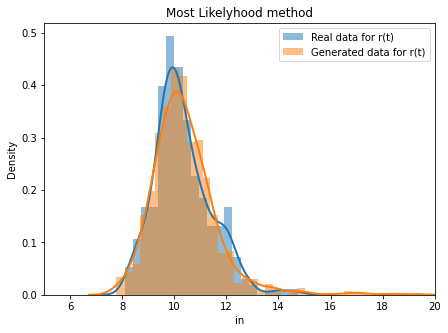

KS-test:  KstestResult(statistic=0.04966918714555765, pvalue=0.3460751289624796)


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


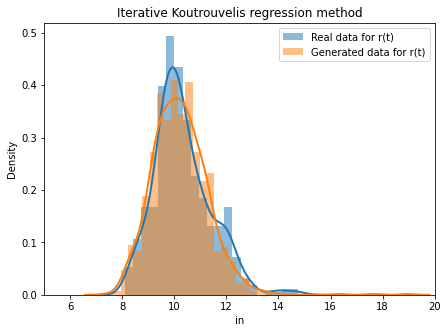

KS-test:  KstestResult(statistic=0.060448015122873344, pvalue=0.15150084492324878)


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


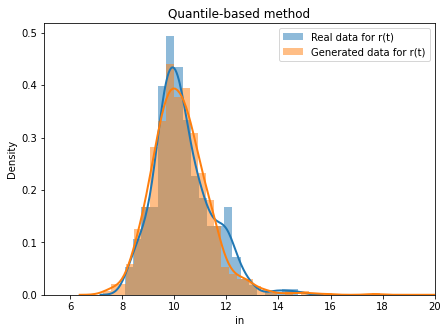

KS-test:  KstestResult(statistic=0.05689413988657845, pvalue=0.2027118245425985)


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


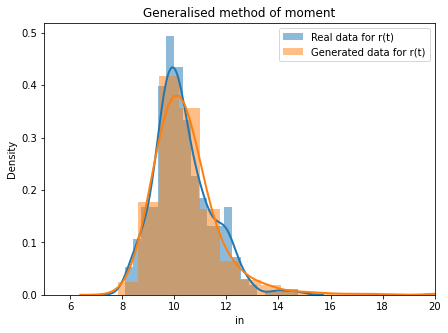

KS-test:  KstestResult(statistic=0.05036672967863894, pvalue=0.32978639907399543)


In [63]:
compare_real_and_fake(log_in, ml, 'Most Likelyhood method')
compare_real_and_fake(log_in, it, 'Iterative Koutrouvelis regression method')
compare_real_and_fake(log_in, qu, 'Quantile-based method')
compare_real_and_fake(log_in, mm, 'Generalised method of moment')

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

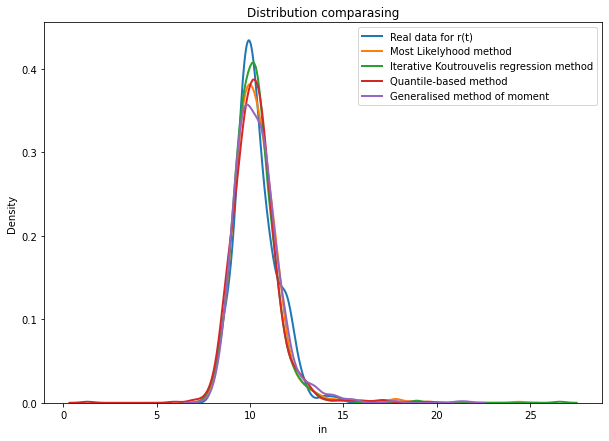

In [38]:
    plt.figure(figsize=(10, 7))
#     plt.hist(real, bins, alpha=0.5, label='Real data for r(t)', density=True)
#     plt.hist(fake, bins, alpha=0.5, label='Generated data for r(t)', density=True)
    sns.distplot(log_in, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Real data for r(t)')
    sns.distplot(ml, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Most Likelyhood method')
    sns.distplot(it, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Iterative Koutrouvelis regression method')
    sns.distplot(qu, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Quantile-based method')
    sns.distplot(mm, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Generalised method of moment')
    plt.title('Distribution comparasing')
    plt.legend(loc='upper right')
    plt.show()

In [39]:
import hurst

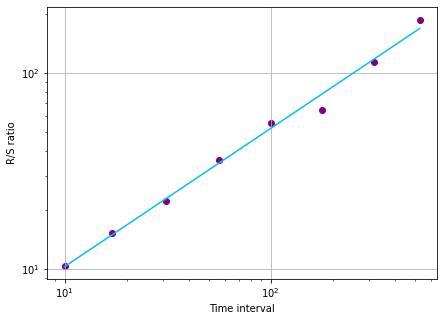

H=0.7046, c=2.0317


In [40]:
H, c, data = hurst.compute_Hc(packets_data['in'], kind='change', simplified=True)

# Plot
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [41]:
H

0.704580022259636

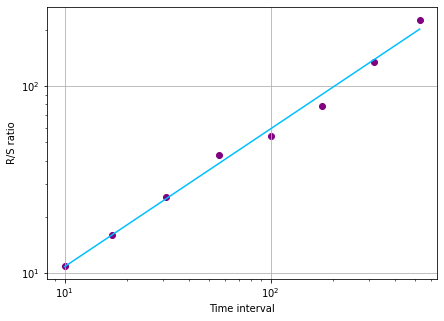

H=0.7364, c=1.9906


In [42]:
H, c, data = hurst.compute_Hc(packets_data['out'], kind='change', simplified=True)

# Plot
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [43]:
H

0.7363827203609129

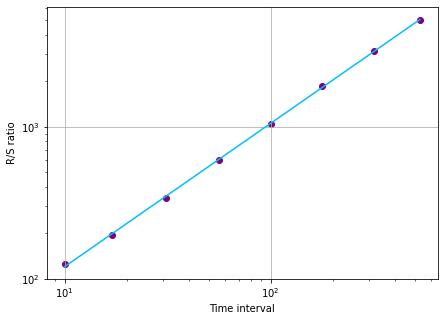

H=0.9418, c=13.7596


In [66]:
H, c, data = hurst.compute_Hc(log_in, kind='change', simplified=True)

# Plot
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [65]:
H

0.9418298090631166